In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv ('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum()

2

In [7]:
df = df.drop_duplicates()

In [8]:
import datetime
date_time = datetime.datetime.now()
df ['Age'] = date_time.year - df ['Year']

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [10]:
df = df.drop (columns = ['Year'])

<Axes: >

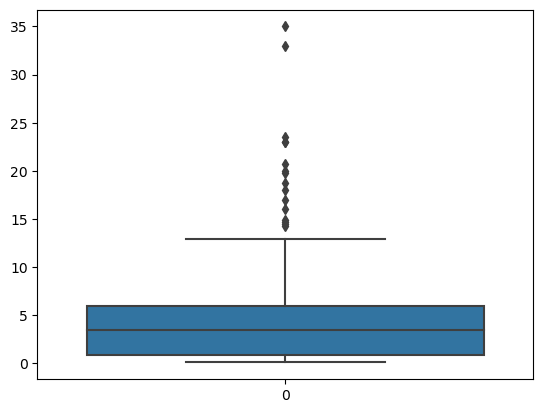

In [11]:
sns.boxplot (df ['Selling_Price'])

In [12]:
sorted (df.Selling_Price, reverse = True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.65,
 3.6,
 3.51

In [13]:
df = df [~(df['Selling_Price'] >= 33.0) & (df['Selling_Price']<=35.0)]
df.shape

(297, 9)

In [14]:
df.Fuel_Type.unique ()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
#coding the categorical variables. mapping
df ['Fuel_Type'] = df ['Fuel_Type'].map({'Petrol':0, 'Diesel': 1, 'CNG':2 })
df ['Seller_Type'] = df ['Seller_Type'].map({'Dealer':0, 'Individual': 1})
df ['Transmission'] = df ['Transmission'].map({'Manual':0, 'Automatic': 1 })

In [17]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [18]:
df.Selling_Price = df.Selling_Price * 100000
df.Present_Price = df.Present_Price * 100000
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,335000.0,559000.0,27000,0,0,0,0,10
1,sx4,475000.0,954000.0,43000,1,0,0,0,11
2,ciaz,725000.0,985000.0,6900,0,0,0,0,7
3,wagon r,285000.0,415000.0,5200,0,0,0,0,13
4,swift,460000.0,687000.0,42450,1,0,0,0,10


In [19]:
#setting x and y variables
x = df.drop (columns = ['Car_Name', 'Selling_Price'], axis = 1)
y = df ['Selling_Price']

In [20]:
y.head()

0    335000.0
1    475000.0
2    725000.0
3    285000.0
4    460000.0
Name: Selling_Price, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 40)

In [23]:
#Building different models

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
lr.fit (x_train, y_train)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor ()
rf.fit (x_train, y_train)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor ()
gbr.fit (x_train, y_train)

from xgboost import XGBRegressor
xg = XGBRegressor ()
xg.fit (x_train, y_train)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit (x_train, y_train)

DecisionTreeRegressor()

In [24]:
# Train scores for the different models

print ('Linear Regression Train Score is', lr.score (x_train, y_train)* 100)
print ('Random Forest Regression Train Score is', rf.score (x_train, y_train)* 100)
print ('Gradient Boosting Regression Train Score is', gbr.score (x_train, y_train)* 100)
print ('XGBoost Regression Train Score is', xg.score (x_train, y_train)* 100)
print ('Decision Tree Regression Train Score is', tree.score (x_train, y_train)* 100)

Linear Regression Train Score is 86.9843268206064
Random Forest Regression Train Score is 99.20276316484765
Gradient Boosting Regression Train Score is 99.57041634650598
XGBoost Regression Train Score is 99.9996509583132
Decision Tree Regression Train Score is 100.0


In [25]:
#Test scores for the different models

print ('Linear Regression Test Score is', lr.score (x_test, y_test) * 100)
print ('Random Forest Regression Test Score is', rf.score (x_test, y_test)* 100)
print ('Gradient Boosting Regression Test Score is', gbr.score (x_test, y_test)* 100)
print ('XGBoost Regression Test Score is', xg.score (x_test, y_test)* 100)
print ('Decision Tree Regression Test Score is', tree.score (x_test, y_test)* 100)

Linear Regression Test Score is 88.80456327737176
Random Forest Regression Test Score is 97.57876804877746
Gradient Boosting Regression Test Score is 97.34763760803898
XGBoost Regression Test Score is 97.77654943877123
Decision Tree Regression Test Score is 93.25150472758997


In [26]:
#Predictions for the models

y_pred1 = lr.predict (x_test)
y_pred2 = rf.predict (x_test)
y_pred3 = gbr.predict (x_test)
y_pred4 = xg.predict (x_test)
y_pred5 = tree.predict (x_test)

In [27]:
from sklearn import metrics

In [28]:
score1 = metrics.r2_score (y_test, y_pred1)
score2 = metrics.r2_score (y_test, y_pred2)
score3 = metrics.r2_score (y_test, y_pred3)
score4 = metrics.r2_score (y_test, y_pred4)
score5 = metrics.r2_score (y_test, y_pred5)

In [29]:
print (score1, score2, score3, score4, score5)

0.8880456327737176 0.9757876804877746 0.9734763760803897 0.9777654943877123 0.9325150472758997


In [30]:
final_data = pd.DataFrame ({'Models': ['LR','RF','GBR', 'XG', 'DT'],
                          'R2_SCORE': [score1,score2,score3,score4,score5]})
final_data

,Models,R2_SCORE
0,LR,0.888046
1,RF,0.975788
2,GBR,0.973476
3,XG,0.977765
4,DT,0.932515


In [41]:
xg = XGBRegressor()
xg_final = xg.fit (x,y)

In [42]:
#Saving the best fit model using joblib

import joblib

In [43]:
joblib.dump (xg_final, 'car_price_predictor')

['car_price_predictor']

In [ ]:
#Building a prediction system

In [44]:
model = joblib.load ('car_price_predictor')

In [45]:
data_new = pd.DataFrame ({
    'Present_Price':300000,
    'Kms_Driven': 400000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':12
}, index = [0])

In [46]:
model.predict (data_new)

array([80369.65], dtype=float32)

In [47]:
#saving final model
xg_final.save_model ('xg_model.json')